# EDA

## Data불러오기

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
#from dataprep.eda import plot, plot_correlation, plot_missing, create_report

In [2]:
import matplotlib as mpl
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 한글 깨짐
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
features = ['broadcast', 'exp_min', 'm_code', 'p_code', 'p_name', 'p_group', 'unit_price', 'total_price']
dtype_list = ['datetime64', 'float64', 'int32', 'int32', 'object', 'object', 'int32', 'float64']
dtypes =  dict(zip(features, dtype_list))

df = pd.read_excel('2019-1.xlsx', header=1, dtype=dtypes)
df.columns=features

df.shape

(38309, 8)

In [4]:
# 판매 개수 변수 추가
df['sales'] = round(df['total_price']/df['unit_price'],0)

In [5]:
df["YEAR"] = df['broadcast'].dt.year
df["MONTH"] = df['broadcast'].dt.month
df["DAY"] = df['broadcast'].dt.day
df["HOUR"] = df['broadcast'].dt.hour
df["MINUTE"] = df['broadcast'].dt.minute
df["SECOND"] = df['broadcast'].dt.second
df["YEAR_DAY"] = df['broadcast'].dt.date
df['DAY_NAME'] = df['broadcast'].dt.day_name()

#독립변수
#종속변수(연속형변수), (target) : total_price, sales?


#명목변수 : m_code, p_code, p_group, unit_price

In [6]:
df.head()

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,2019,1,1,6,0,0,2019-01-01,Tuesday
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,2019,1,1,6,0,0,2019-01-01,Tuesday
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,2019,1,1,6,20,0,2019-01-01,Tuesday
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,2019,1,1,6,20,0,2019-01-01,Tuesday
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,2019,1,1,6,40,0,2019-01-01,Tuesday


In [7]:
df.tail()

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN,2020,1,1,0,20,0,2020-01-01,Wednesday
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN,2020,1,1,0,40,0,2020-01-01,Wednesday
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN,2020,1,1,1,0,0,2020-01-01,Wednesday
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN,NaN,2020,1,1,1,20,0,2020-01-01,Wednesday
38308,2020-01-01 01:40:00,17.166667,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN,NaN,2020,1,1,1,40,0,2020-01-01,Wednesday


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   broadcast    38309 non-null  datetime64[ns]
 1   exp_min      21525 non-null  float64       
 2   m_code       38309 non-null  int64         
 3   p_code       38309 non-null  int64         
 4   p_name       38309 non-null  object        
 5   p_group      38309 non-null  object        
 6   unit_price   38309 non-null  int64         
 7   total_price  35379 non-null  float64       
 8   sales        35379 non-null  float64       
 9   YEAR         38309 non-null  int64         
 10  MONTH        38309 non-null  int64         
 11  DAY          38309 non-null  int64         
 12  HOUR         38309 non-null  int64         
 13  MINUTE       38309 non-null  int64         
 14  SECOND       38309 non-null  int64         
 15  YEAR_DAY     38309 non-null  object        
 16  DAY_

In [9]:
df.describe()

,exp_min,m_code,p_code,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
count,21525.000000,38309.000000,38309.000000,3.830900e+04,3.537900e+04,35379.000000,38309.000000,38309.000000,38309.000000,38309.000000,38309.000000,38309.0
mean,20.174664,100390.972148,201219.923334,4.565537e+05,2.310241e+07,314.797366,2019.000235,6.513978,15.400298,14.268423,20.078050,0.0
std,3.633757,249.927870,735.677344,7.260555e+05,2.005790e+07,427.827697,0.015326,3.379690,8.712062,6.701197,16.402345,0.0
min,2.466667,100000.000000,200000.000000,0.000000e+00,1.030000e+05,1.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,20.000000,100155.000000,200550.000000,5.900000e+04,7.998500e+06,26.000000,2019.000000,4.000000,8.000000,10.000000,0.000000,0.0
50%,20.000000,100346.000000,201167.000000,1.090000e+05,1.732600e+07,130.000000,2019.000000,6.000000,15.000000,15.000000,20.000000,0.0
75%,20.000000,100596.000000,201863.000000,4.990000e+05,3.276300e+07,452.000000,2019.000000,9.000000,23.000000,21.000000,40.000000,0.0
max,60.000000,100849.000000,202513.000000,7.930000e+06,3.220090e+08,8070.000000,2020.000000,12.000000,31.000000,23.000000,50.000000,0.0


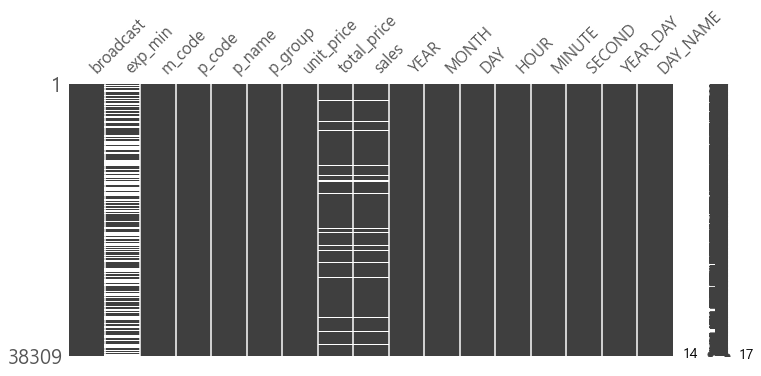

In [10]:
msno.matrix(df, figsize=(12,5))

In [11]:
# 시간 계산을 위한 패키지
from datetime import datetime, timedelta

In [12]:
df2 = df.copy()
month = np.array(df['MONTH'])
day = np.array(df['DAY'])
hour = np.array(df['HOUR'])
minute = np.array(df['MINUTE'])

for i in range(len(df)) :
    if hour[i] ==0 or hour[i] ==1 or hour[i] ==2:
        df2['broadcast'][i] = pd.DatetimeIndex(df2['broadcast'])[i] - timedelta(days=1)
        
df2['MONTH'] = month
df2['DAY'] = day
df2['HOUR'] = hour
df2['MINUTE'] = minute

<ipython-input-12-36d4a4d76127>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['broadcast'][i] = pd.DatetimeIndex(df2['broadcast'])[i] - timedelta(days=1)


In [13]:
# 무형 데이터 제거
df2 = df2[df2.p_group != '무형']

In [14]:
df2.isnull().sum() #null값 처리 어떻게 할것인가?

broadcast          0
exp_min        16784
m_code             0
p_code             0
p_name             0
p_group            0
unit_price         0
total_price     1993
sales           1993
YEAR               0
MONTH              0
DAY                0
HOUR               0
MINUTE             0
SECOND             0
YEAR_DAY           0
DAY_NAME           0
dtype: int64

In [15]:
df2["YEAR"] = df2['broadcast'].dt.year
df2["MONTH"] = df2['broadcast'].dt.month
df2["DAY"] = df2['broadcast'].dt.day
df2["HOUR"] = df2['broadcast'].dt.hour
df2["MINUTE"] = df2['broadcast'].dt.minute
df2["SECOND"] = df2['broadcast'].dt.second
df2["YEAR_DAY"] = df2['broadcast'].dt.date
df2['DAY_NAME'] = df2['broadcast'].dt.day_name()

## 취급액 살표보기(평균)

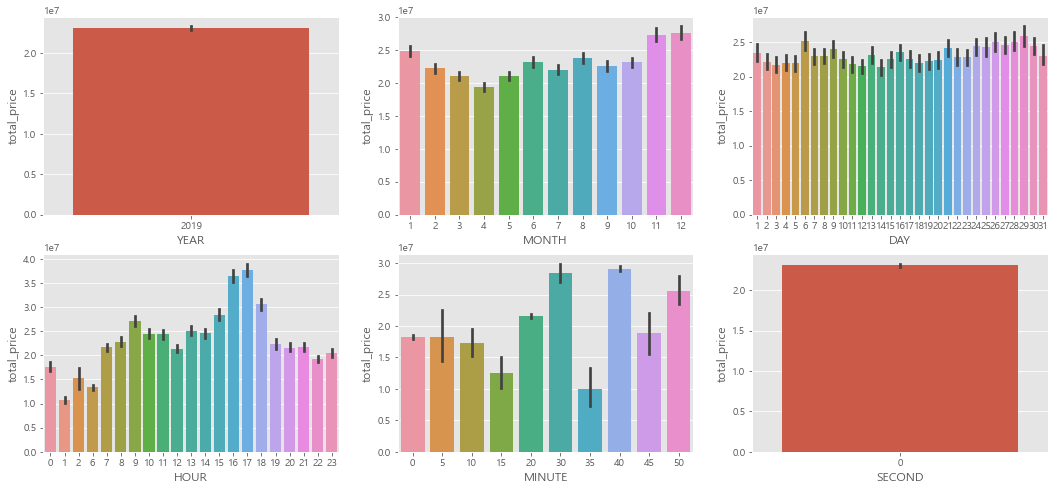

In [16]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=df2, x="YEAR", y="total_price", ax=ax1)
sns.barplot(data=df2, x="MONTH", y="total_price", ax=ax2)
sns.barplot(data=df2, x="DAY", y="total_price", ax=ax3)
sns.barplot(data=df2, x="HOUR", y="total_price", ax=ax4)
sns.barplot(data=df2, x="MINUTE", y="total_price", ax=ax5)
sns.barplot(data=df2, x="SECOND", y="total_price", ax=ax6)

In [82]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]

# 카테고리 살펴보기

In [18]:
data=df2

In [19]:
grouped_by_category = data["total_price"].groupby(data["p_group"])
grouped_by_category_sum=pd.DataFrame(grouped_by_category.sum()).reset_index()

Text(0.5, 1.0, '카테고리별 취급액(합계)')

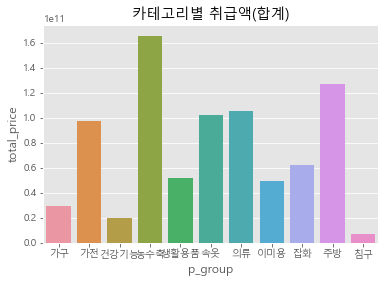

In [20]:
sns.barplot(x="p_group", y="total_price", data=grouped_by_category_sum)
plt.title("카테고리별 취급액(합계)")

In [21]:
# 전체적인 방송 빈도에 비해 농수축의 취급액이 매우 높은편!!!!
# 취급액이 높은 카테고리 : 농추축, 주방, 의류, 속옷

In [22]:
grouped_by_category.mean().sort_values()

p_group
침구      1.052947e+07
가구      1.265471e+07
잡화      1.686131e+07
생활용품    1.865005e+07
가전      1.879933e+07
주방      1.930615e+07
의류      2.442927e+07
건강기능    2.557712e+07
속옷      2.613721e+07
이미용     3.779511e+07
농수축     4.272457e+07
Name: total_price, dtype: float64

Text(0.5, 1.0, '카테고리별 취급액(평균)')

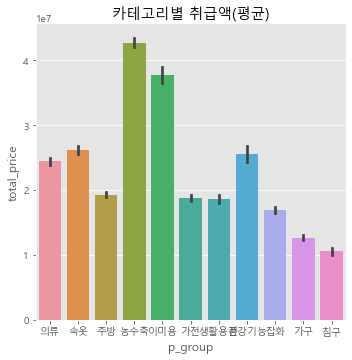

In [23]:
sns.catplot(x="p_group", y="total_price", kind='bar', data=df2)
plt.title("카테고리별 취급액(평균)")

In [24]:
p_group_name_list = np.unique(data['p_group'])
#['가구', '가전', '건강기능', '농수축', '생활용품', '속옷', '의류', '이미용', '잡화', '주방', '침구']

In [25]:
data['p_group'].value_counts()

주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
건강기능     790
침구       669
Name: p_group, dtype: int64

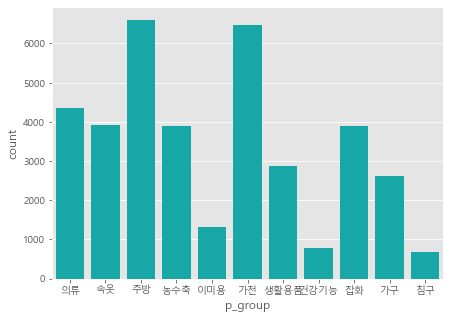

In [26]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x=data['p_group'], data=data, color="c")

# 데이터 잘라내기

In [27]:
속옷_data=data[data['p_group'] == '속옷']
의류_data=data[data['p_group'] == '의류']

In [28]:
underwear_data = 속옷_data.loc[:, ['MONTH','DAY','DAY_NAME', 'unit_price', 'total_price', 'sales']]
clothing_data = 의류_data.loc[:, ['MONTH','DAY','DAY_NAME', 'unit_price', 'total_price', 'sales']]

# 속옷

In [29]:
# total_price = 0 제거
속옷_data=속옷_data[속옷_data.total_price.notnull()]

In [30]:
속옷_data.isnull().sum()

broadcast         0
exp_min        1014
m_code            0
p_code            0
p_name            0
p_group           0
unit_price        0
total_price       0
sales             0
YEAR              0
MONTH             0
DAY               0
HOUR              0
MINUTE            0
SECOND            0
YEAR_DAY          0
DAY_NAME          0
dtype: int64

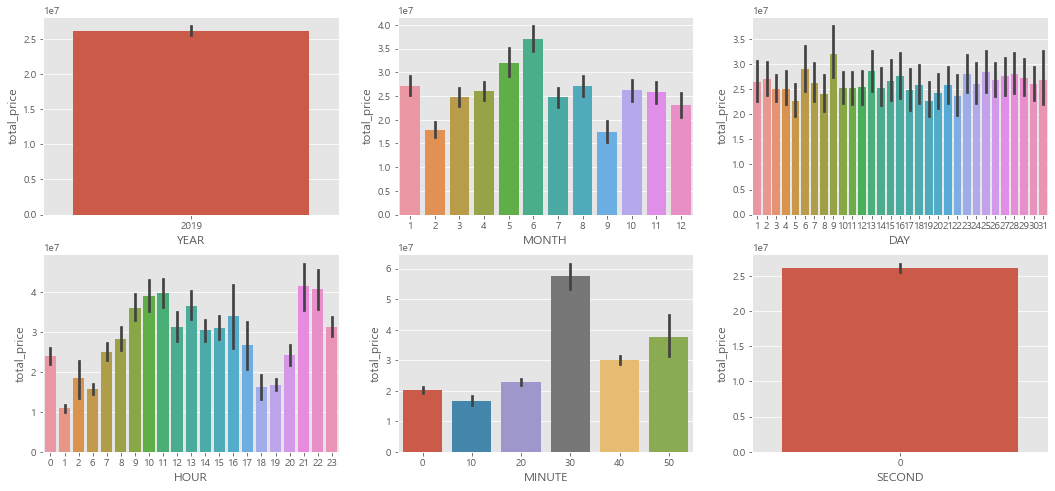

In [31]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=속옷_data, x="YEAR", y="total_price", ax=ax1)
sns.barplot(data=속옷_data, x="MONTH", y="total_price", ax=ax2)
sns.barplot(data=속옷_data, x="DAY", y="total_price", ax=ax3)
sns.barplot(data=속옷_data, x="HOUR", y="total_price", ax=ax4)
sns.barplot(data=속옷_data, x="MINUTE", y="total_price", ax=ax5)
sns.barplot(data=속옷_data, x="SECOND", y="total_price", ax=ax6)

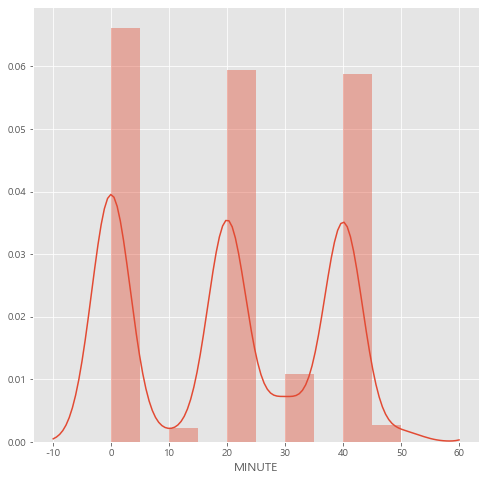

In [32]:
#30분 취급액이 높은 이유는? 
f, ax = plt.subplots(figsize=(8, 8))
sns.distplot(속옷_data['MINUTE'])

In [33]:
grouped_total_price_by_minute = 속옷_data["total_price"].groupby(속옷_data["MINUTE"])
grouped_total_price_by_minute.sum()

MINUTE
0     2.614447e+10
10    7.054160e+08
20    2.663763e+10
30    1.218419e+10
40    3.452723e+10
50    1.997549e+09
Name: total_price, dtype: float64

In [34]:
underwear_data['total_price'].describe()
#count         3,910.00000
#mean     26,137,207.67263
#std      21,343,672.60222
#min         282,000.00000
#25%      10,264,500.00000
#50%      20,670,000.00000
#75%      36,762,000.00000
#max     153,959,000.00000(1억 5천)

count    3.910000e+03
mean     2.613721e+07
std      2.134367e+07
min      2.820000e+05
25%      1.026450e+07
50%      2.067000e+07
75%      3.676200e+07
max      1.539590e+08
Name: total_price, dtype: float64

In [35]:
grouped_underwear = underwear_data["total_price"].groupby(underwear_data["DAY_NAME"])
grouped_underwear.sum()

DAY_NAME
Friday       1.231718e+10
Monday       1.429248e+10
Saturday     1.517427e+10
Sunday       1.731206e+10
Thursday     1.384263e+10
Tuesday      1.580816e+10
Wednesday    1.344970e+10
Name: total_price, dtype: float64

In [36]:
요일 = np.unique(underwear_data['DAY_NAME'])

Text(0.5, 1.0, '속옷 요일별 취급액(합계)')

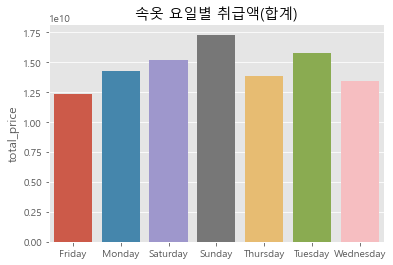

In [37]:
sns.barplot(x=요일, y=grouped_underwear.sum())
plt.title("속옷 요일별 취급액(합계)")

Text(0.5, 1.0, '속옷 요일별 취급액(평균)')

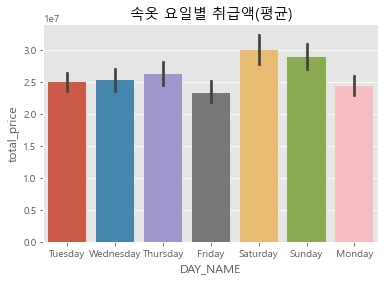

In [38]:
sns.barplot(x=underwear_data['DAY_NAME'], y=underwear_data['total_price'], data=underwear_data)
plt.title("속옷 요일별 취급액(평균)")
# 평균적으로 주말 매출이 높은편
# 금요일 매출이 가장 작다.

Text(0.5, 1.0, '속옷 요일별 취급액')

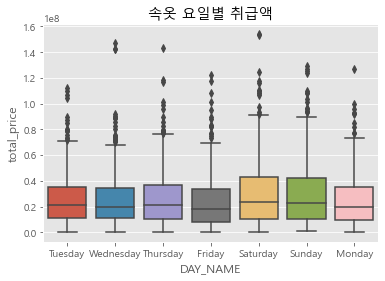

In [39]:
sns.boxplot(x=underwear_data['DAY_NAME'], y=underwear_data['total_price'])
plt.title("속옷 요일별 취급액")

In [40]:
#underwear_data.head()

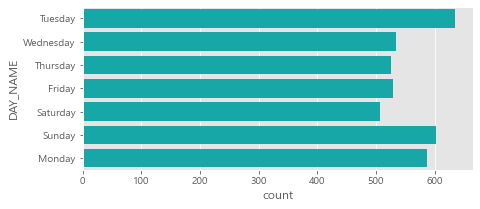

In [41]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y=underwear_data['DAY_NAME'], data=underwear_data, color="c")

In [42]:
# 금요일이 방송횟수는 적은 편이지만 매출은 높은날 -> 비싼 물건들을 파는가? 왜 금요일인지 생각해보기
# [일,월,화]에 다른 요일에 비해 방송 횟수가 높은편이다.->왜? 

In [43]:
속옷_방송횟수_요일 = underwear_data['DAY_NAME'].value_counts().sort_values()
속옷_방송횟수_요일

Saturday     507
Thursday     526
Friday       529
Wednesday    534
Monday       587
Sunday       602
Tuesday      634
Name: DAY_NAME, dtype: int64

Text(0.5, 1.0, '속옷 월별 취급액(평균)')

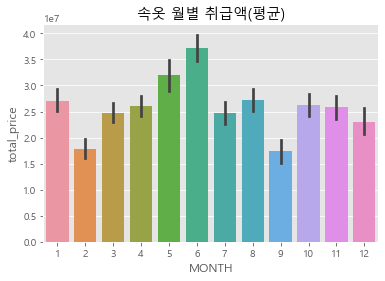

In [44]:
sns.barplot(x="MONTH", y="total_price", data=underwear_data)
plt.title("속옷 월별 취급액(평균)")

In [45]:
grouped_underwear_by_month = underwear_data["total_price"].groupby(underwear_data["MONTH"])
grouped_underwear_by_month.sum()

MONTH
1     1.060005e+10
2     6.527807e+09
3     1.018275e+10
4     9.043216e+09
5     1.110494e+10
6     1.391574e+10
7     9.093573e+09
8     8.410708e+09
9     3.541833e+09
10    6.659845e+09
11    6.727834e+09
12    6.388185e+09
Name: total_price, dtype: float64

In [46]:
월 = np.unique(underwear_data['MONTH'])

Text(0.5, 1.0, '속옷 월별 취급액(합계)')

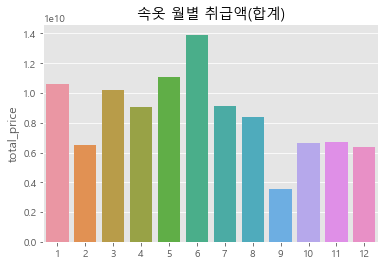

In [47]:
sns.barplot(x=월, y=grouped_underwear_by_month.sum())
plt.title("속옷 월별 취급액(합계)")

In [48]:
# 3월, 1월, 6월 순으로 방송 횟수가 많음
# 9-12월은 방송 횟수가 확 줄어든다!

In [49]:
속옷_방송횟수_월 = underwear_data['MONTH'].value_counts().sort_index()
t = pd.DataFrame(속옷_방송횟수_월).reset_index()

Text(0.5, 1.0, '속옷 월별 방송횟수')

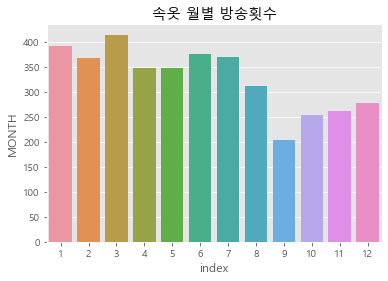

In [50]:
sns.barplot(x='index', y='MONTH', data=t)
plt.title("속옷 월별 방송횟수")

In [51]:
grouped_exp_min = 속옷_data['exp_min'].groupby(속옷_data["MONTH"])
grouped_exp_min.sum()

MONTH
1     6496.650000
2     4630.450000
3     6056.100000
4     5977.233333
5     6021.000000
6     7010.833333
7     5077.533333
8     4940.933333
9     2358.416667
10    3506.733333
11    3391.000000
12    2984.983333
Name: exp_min, dtype: float64

Text(0.5, 1.0, '속옷 월별 노출시간(합계)')

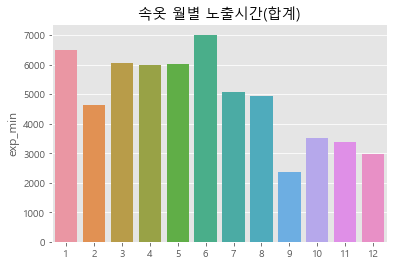

In [52]:
sns.barplot(x=월, y=grouped_exp_min.sum())
plt.title("속옷 월별 노출시간(합계)")

## unit price

In [53]:
속옷_data['unit_price'].describe()

count      3910.000000
mean      77971.253197
std       25768.645135
min       29900.000000
25%       59000.000000
50%       79000.000000
75%       89000.000000
max      139000.000000
Name: unit_price, dtype: float64

Text(0.5, 1.0, '속옷 판매 단가')

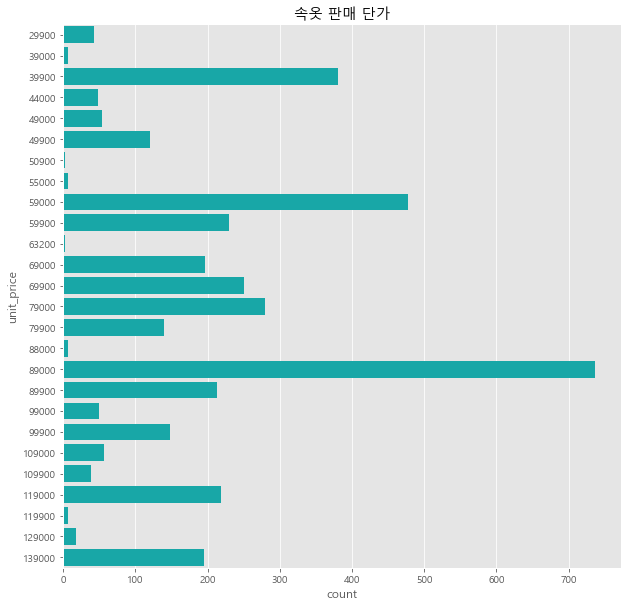

In [54]:
f, ax = plt.subplots(figsize=(10, 10))

sns.countplot(y=underwear_data['unit_price'], data=underwear_data, color="c")
plt.title("속옷 판매 단가")
#주요 가격대 89,000

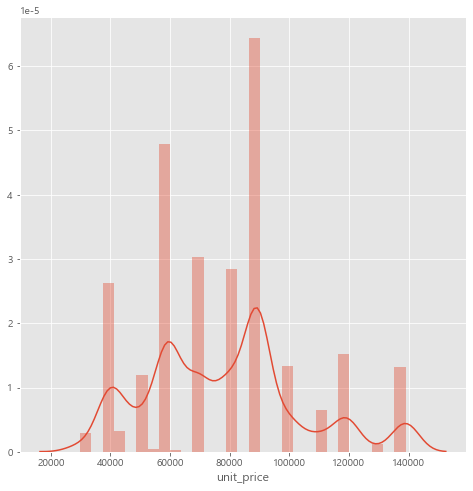

In [55]:
f, ax = plt.subplots(figsize=(8, 8))
sns.distplot(속옷_data['unit_price'])

# Hour

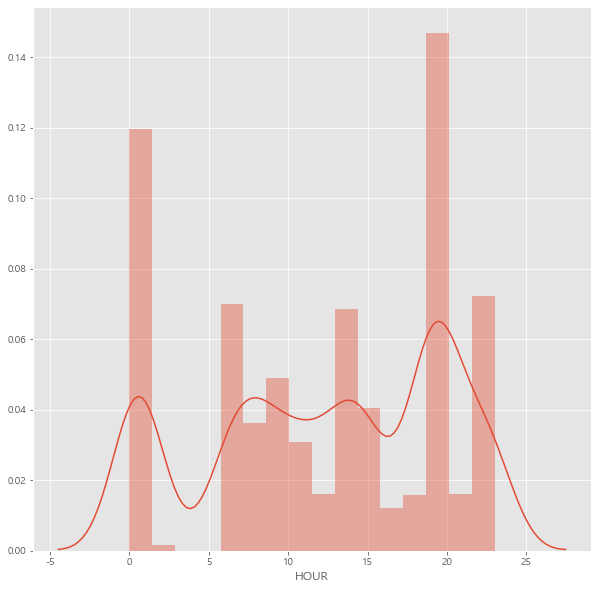

In [56]:
f, ax = plt.subplots(figsize=(10, 10))
sns.distplot(속옷_data['HOUR'])

In [57]:
# 자정과 7시에 편셩빈도가 높다.

# 의류

In [58]:
# total_price = 0 제거
의류_data=의류_data[의류_data.total_price.notnull()]

In [59]:
의류_data.isnull().sum()

broadcast         0
exp_min        1100
m_code            0
p_code            0
p_name            0
p_group           0
unit_price        0
total_price       0
sales             0
YEAR              0
MONTH             0
DAY               0
HOUR              0
MINUTE            0
SECOND            0
YEAR_DAY          0
DAY_NAME          0
dtype: int64

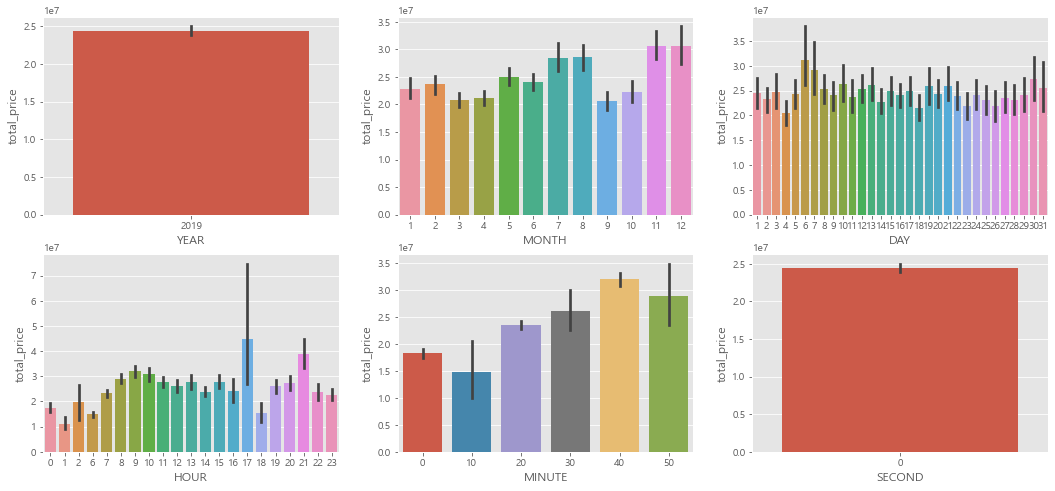

In [60]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=의류_data, x="YEAR", y="total_price", ax=ax1)
sns.barplot(data=의류_data, x="MONTH", y="total_price", ax=ax2)
sns.barplot(data=의류_data, x="DAY", y="total_price", ax=ax3)
sns.barplot(data=의류_data, x="HOUR", y="total_price", ax=ax4)
sns.barplot(data=의류_data, x="MINUTE", y="total_price", ax=ax5)
sns.barplot(data=의류_data, x="SECOND", y="total_price", ax=ax6)

In [61]:
# 5시 판매량이 많은 이유는?

In [62]:
의류_data_5시=의류_data[의류_data['HOUR'] == 17]
의류_data_5시

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME
6937,2019-03-12 17:00:00,20.0,100452,201395,NNF SS트레이닝 세트,의류,49000,16290000.0,332.0,2019,3,12,17,0,0,2019-03-12,Tuesday
6938,2019-03-12 17:20:00,20.0,100452,201395,NNF SS트레이닝 세트,의류,49000,45484000.0,928.0,2019,3,12,17,20,0,2019-03-12,Tuesday
6939,2019-03-12 17:40:00,20.0,100452,201395,NNF SS트레이닝 세트,의류,49000,53202000.0,1086.0,2019,3,12,17,40,0,2019-03-12,Tuesday
31802,2019-10-27 17:00:00,20.0,100338,201055,스튜디오럭스 밴딩팬츠 4종,의류,59000,27156000.0,460.0,2019,10,27,17,0,0,2019-10-27,Sunday
31803,2019-10-27 17:20:00,20.0,100338,201055,스튜디오럭스 밴딩팬츠 4종,의류,59000,37346000.0,633.0,2019,10,27,17,20,0,2019-10-27,Sunday
31804,2019-10-27 17:40:00,20.0,100338,201055,스튜디오럭스 밴딩팬츠 4종,의류,59000,55394000.0,939.0,2019,10,27,17,40,0,2019-10-27,Sunday
34455,2019-11-23 17:20:00,20.0,100107,200298,르까프 남성 핫멜트 덕다운 트랙 3종,의류,139000,15133000.0,109.0,2019,11,23,17,20,0,2019-11-23,Saturday
34456,2019-11-23 17:20:00,NaN,100107,200301,르까프 여성 핫멜트 덕다운 트랙 3종,의류,139000,6876000.0,49.0,2019,11,23,17,20,0,2019-11-23,Saturday
34457,2019-11-23 17:40:00,20.0,100107,200298,르까프 남성 핫멜트 덕다운 트랙 3종,의류,139000,37547000.0,270.0,2019,11,23,17,40,0,2019-11-23,Saturday
34458,2019-11-23 17:40:00,NaN,100107,200301,르까프 여성 핫멜트 덕다운 트랙 3종,의류,139000,12307000.0,89.0,2019,11,23,17,40,0,2019-11-23,Saturday


[Text(0.5, 1.0, '판매량 분포')]

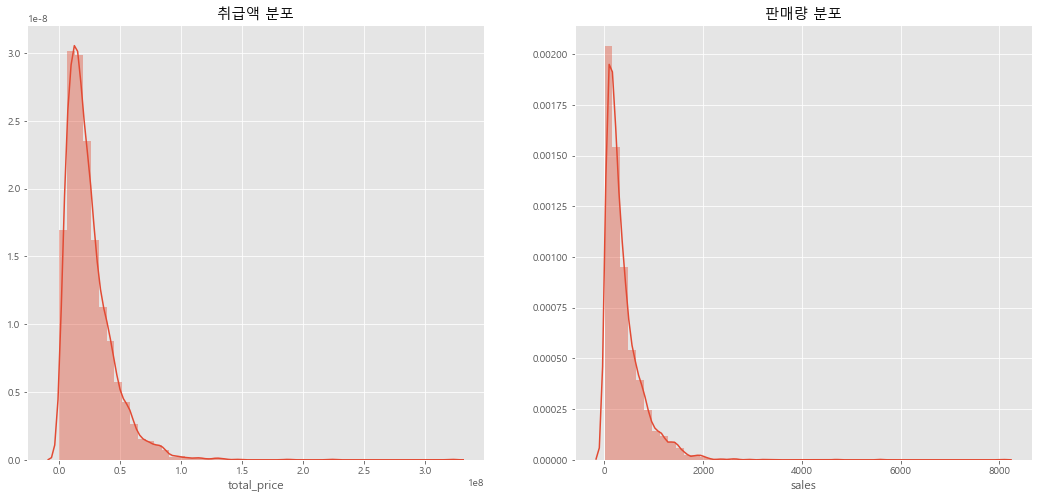

In [63]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)
sns.distplot(의류_data['total_price'], ax=ax1)
sns.distplot(의류_data['sales'], ax=ax2)

ax1.set(title="취급액 분포")
ax2.set(title="판매량 분포")

In [64]:
#판다스 지수 표현 바꾸기
pd.options.display.float_format = '{:.5f}'.format

In [65]:
clothing_data['total_price'].describe()
#count         4,331.00000
#mean     24,429,265.06580 (2천 4백)
#std      19,241,682.98370
#min         220,000.00000
#25%      11,384,500.00000
#50%      19,764,000.00000
#75%      32,289,500.00000
#max     322,009,000.00000 (3억 2천)

count        4331.00000
mean     24429265.06580
std      19241682.98370
min        220000.00000
25%      11384500.00000
50%      19764000.00000
75%      32289500.00000
max     322009000.00000
Name: total_price, dtype: float64

In [66]:
grouped_clothing = clothing_data["total_price"].groupby(clothing_data["DAY_NAME"])
grouped_clothing.sum()

DAY_NAME
Friday      12657641000.00000
Monday      12082694000.00000
Saturday    21548264000.00000
Sunday      22393984000.00000
Thursday    11786577000.00000
Tuesday     13473749000.00000
Wednesday   11860238000.00000
Name: total_price, dtype: float64

Text(0.5, 1.0, '의류 요일별 취급액(합계)')

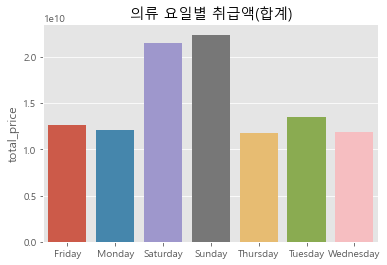

In [67]:
sns.barplot(x=요일, y=grouped_clothing.sum())
plt.title("의류 요일별 취급액(합계)")
# 토,일 주말 매출이 앞도적으로 높음

In [68]:
grouped_clothing = clothing_data["total_price"].groupby(clothing_data["DAY_NAME"])
grouped_clothing.mean()

DAY_NAME
Friday      23013892.72727
Monday      20137823.33333
Saturday    27912259.06736
Sunday      27210187.12029
Thursday    24152821.72131
Tuesday     23805210.24735
Wednesday   22293680.45113
Name: total_price, dtype: float64

Text(0.5, 1.0, '의류 요일별 취급액(평균)')

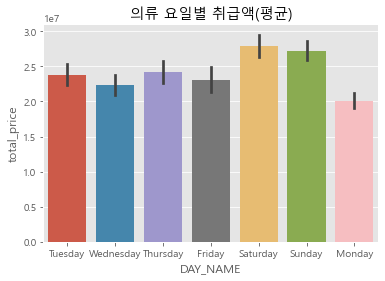

In [69]:
sns.barplot(x=clothing_data['DAY_NAME'], y=clothing_data['total_price'], data=clothing_data)
plt.title("의류 요일별 취급액(평균)")

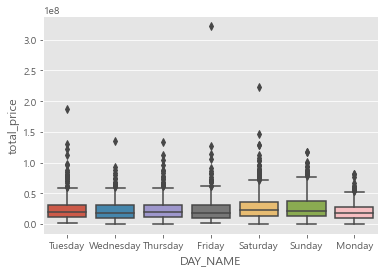

In [70]:
sns.boxplot(x=clothing_data['DAY_NAME'], y=clothing_data['total_price'])

In [71]:
grouped_by_month_clothing = clothing_data["total_price"].groupby(clothing_data["MONTH"])

Text(0.5, 1.0, '월별 취급액(평균)')

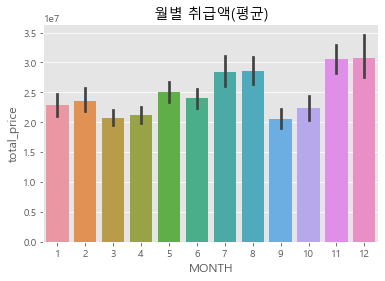

In [72]:
sns.barplot(x="MONTH", y="total_price", data=clothing_data)
plt.title("월별 취급액(평균)")

# 여름&겨울 시즌과 상관 있어보인다. 

## 방송 횟수

In [73]:
의류_방송횟수_요일 = clothing_data['DAY_NAME'].value_counts().sort_values()
의류_방송횟수_요일

Thursday     488
Wednesday    534
Friday       553
Tuesday      566
Monday       600
Saturday     773
Sunday       826
Name: DAY_NAME, dtype: int64

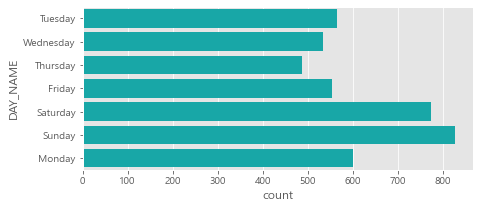

In [74]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y=clothing_data['DAY_NAME'], data=clothing_data, color="c");

# unit_price

In [75]:
의류_data['unit_price'].describe()

count      4331.00000
mean     151053.63657
std      342800.31084
min       29000.00000
25%       49000.00000
50%       69000.00000
75%       79900.00000
max     2490000.00000
Name: unit_price, dtype: float64

Text(0.5, 1.0, '의류 판매 단가')

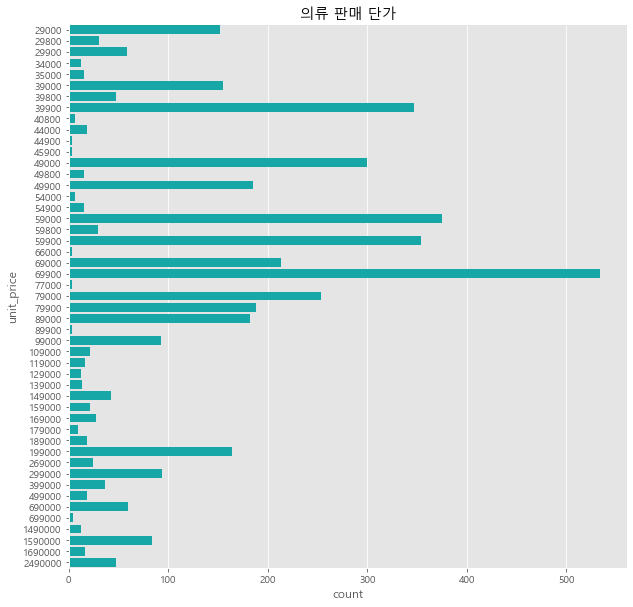

In [76]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y=clothing_data['unit_price'], data=의류_data, color="c")
plt.title("의류 판매 단가")

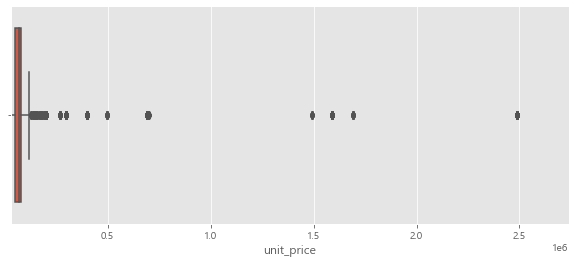

In [77]:
f, ax = plt.subplots(figsize=(10, 4))
plt.xlim(의류_data.unit_price.min(), 의류_data.unit_price.max()*1.1)
sns.boxplot(x=의류_data.unit_price)

In [78]:
# 어디서붙 이상치인지 제거할지 생각해보기

# sales

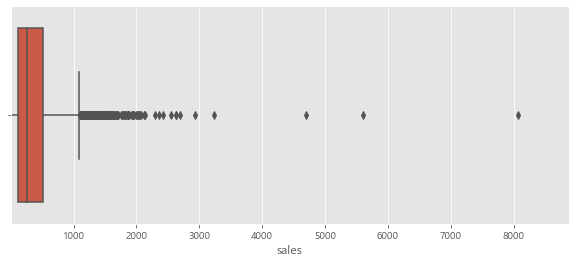

In [79]:
f, ax = plt.subplots(figsize=(10, 4))
plt.xlim(의류_data.sales.min(), 의류_data.sales.max()*1.1)
sns.boxplot(x=의류_data.sales)

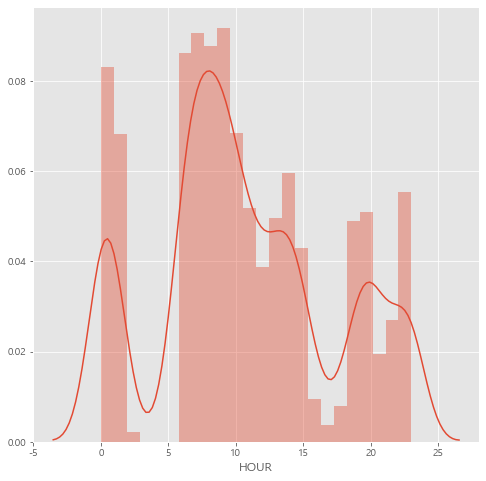

In [80]:
f, ax = plt.subplots(figsize=(8, 8))
sns.distplot(의류_data['HOUR'])

In [81]:
# seaborn 참고 : https://seaborn.pydata.org/tutorial/categorical.html